In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values
# they are in string 

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
pd.to_numeric(df.TotalCharges)


ValueError: Unable to parse string " " at position 488

In [22]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [24]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [26]:
df.shape


(7043, 20)

In [28]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [30]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


C:\Users\aksha\AppData\Local\Temp\ipykernel_37204\62923673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [32]:
df1.TotalCharges.values


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [34]:
df1[df1.Churn=='No']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


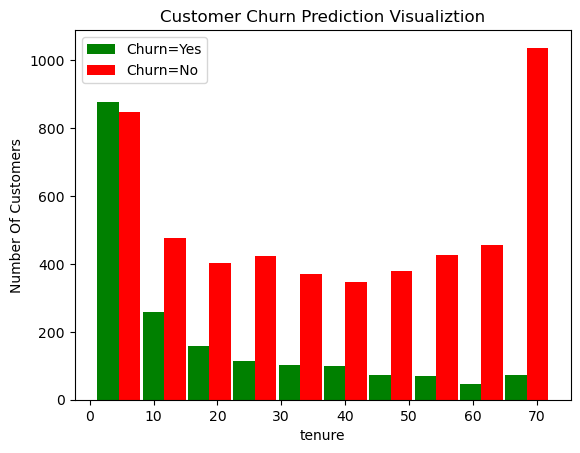

In [36]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

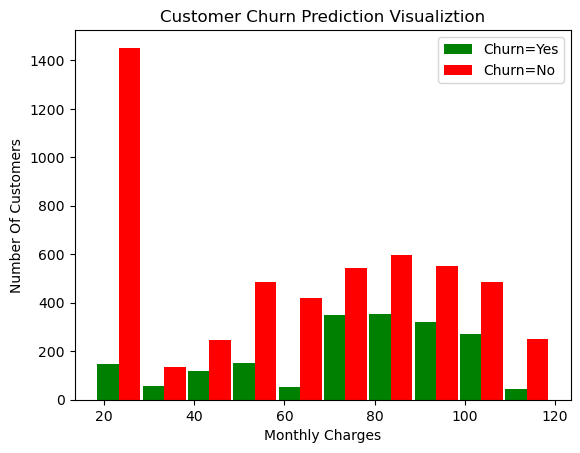

In [38]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [40]:

def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [42]:
print_unique_col_values(df1)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [44]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_37204\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\aksha\AppData\Local\Temp\ipykernel_37204\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [46]:
print_unique_col_values(df1)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [48]:

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_37204\826058134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [50]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [52]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)


C:\Users\aksha\AppData\Local\Temp\ipykernel_37204\290785505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [56]:
df1.dtypes


gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [60]:
#very important thing known as one hot incoding basically it converts that columns which have seperate strings as a columns 

df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [62]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [64]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [66]:
scalar=StandardScaler()
scalar.fit(X)
scalar.transform(X)

array([[ 1.00943013, -0.44032709,  1.03561683, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [-0.99065797, -0.44032709, -0.9656081 , ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.99065797, -0.44032709, -0.9656081 , ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       ...,
       [ 1.00943013, -0.44032709,  1.03561683, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [-0.99065797,  2.27103902,  1.03561683, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.99065797, -0.44032709, -0.9656081 , ..., -0.5253508 ,
        -0.71186341, -0.54360352]])

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [70]:
X_train.shape


(5625, 26)

In [72]:
X_train[:10]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,10,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
101,1,0,1,1,1,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
2621,0,0,1,0,71,1,0,0,1,1,...,True,False,False,False,False,True,False,True,False,False
392,1,1,0,0,2,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1327,0,0,1,0,59,1,1,0,0,1,...,False,True,False,False,True,False,True,False,False,False
3607,1,0,0,0,13,1,0,1,0,0,...,True,False,False,False,True,False,False,False,False,True
2773,0,0,1,0,24,0,0,0,0,1,...,True,False,False,True,False,False,False,False,True,False
1936,1,0,1,0,51,1,0,1,1,0,...,True,False,False,False,True,False,True,False,False,False
5387,0,0,0,0,4,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
4331,0,0,0,0,71,1,1,0,0,0,...,False,False,True,False,False,True,True,False,False,False


In [74]:
X_test.shape


(1407, 26)

In [76]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


D:\Installation_path\ANACONDA\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.6787 - loss: 64.5545 
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.6463 - loss: 1.2969
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.7424 - loss: 1.0151
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.7516 - loss: 0.9953
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.7510 - loss: 1.1012
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.7414 - loss: 1.2265
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.7420 - loss: 1.6023
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.7702 - loss: 0.7498
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.7630 - loss: 0.8854
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.7602 - loss: 1.1050
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.7579 - loss: 0.9090
Epoch 12/100
176/176 ━━━━━━━━

In [77]:
model.evaluate(X_test, y_test)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.8039 - loss: 0.4400


[0.4404979348182678, 0.7945984601974487]

In [78]:
yp = model.predict(X_test)
yp[:5]


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.1634312 ],
       [0.3512716 ],
       [0.00654188],
       [0.8179207 ],
       [0.5792978 ]], dtype=float32)

In [79]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [80]:
y_pred[:10]


[0, 0, 0, 1, 1, 1, 0, 1, 1, 0]

In [81]:

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       999
           1       0.64      0.65      0.65       408

    accuracy                           0.79      1407
   macro avg       0.75      0.75      0.75      1407
weighted avg       0.80      0.79      0.79      1407



In [90]:
from sklearn.metrics import confusion_matrix , classification_report

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds


Mitigating Skewdness of Data

Method 1: Undersampling

In [93]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [95]:

# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [97]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [99]:
# Number of classes in training Data
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [101]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


D:\Installation_path\ANACONDA\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - accuracy: 0.5947 - loss: 8.4113   
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.6752 - loss: 0.7631
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.6956 - loss: 0.6911
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.6981 - loss: 0.8461
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.7108 - loss: 0.6481
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.6851 - loss: 0.8868
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.7188 - loss: 0.6406
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.7267 - loss: 0.6560
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.7003 - loss: 0.7324
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.7038 - loss: 0.8212
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.7400 - loss: 0.6002
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/s

Method2: Oversampling

In [104]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [106]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [108]:
# Number of classes in training Data
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [112]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


D:\Installation_path\ANACONDA\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.5794 - loss: 25.5525
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.6849 - loss: 1.1413
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.7146 - loss: 0.6731
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.7207 - loss: 0.7271
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.7259 - loss: 0.7904
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.7122 - loss: 0.8391
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.7316 - loss: 0.7415
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.7084 - loss: 0.8568
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.7235 - loss: 0.7440
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.7294 - loss: 0.7086
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.7282 - loss: 0.7551
Epoch 12/100
259/259 ━━━━━━━━━

Method3: SMOTE

In [115]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [123]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()



Churn
0    5163
1    5163
Name: count, dtype: int64

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [127]:
# Number of classes in training Data
y_train.value_counts()


Churn
1    4130
0    4130
Name: count, dtype: int64

In [129]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


D:\Installation_path\ANACONDA\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.5995 - loss: 18.8224
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.7114 - loss: 0.7451
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.7227 - loss: 0.7176
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.7270 - loss: 0.7122
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.7556 - loss: 0.5833
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.7474 - loss: 0.6008
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.7431 - loss: 0.6508
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.7525 - loss: 0.6618
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.7514 - loss: 0.6317
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.7815 - loss: 0.4885
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.7694 - loss: 0.5772
Epoch 12/100
259/259 ━━━━━━━━━